In [5]:
!pip install --no-cache-dir transformers sentence-transformers accelerate PyMuPDF tqdm

In [6]:

import torch
print(torch.__version__)
print("CUDA:", torch.cuda.is_available())

# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer("all-mpnet-base-v2", device="cuda")
# print("Success")


2.9.0+cu128
CUDA: True


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Success


In [7]:
# Download PDF file
import os
import requests

pdf_path = "human-nutrition-text.pdf"

if not os.path.exists(pdf_path):
  print("File doesn't exist, downlaoding")

  url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  filename = pdf_path

  response = requests.get(url)

  if response.status_code == 200:
      with open(filename, "wb") as file:
          file.write(response.content)
      print(f"The file has been downloaded and saved as {filename}")
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")
else:
  print(f"File {pdf_path} exists.")

File doesn't exist, downlaoding
The file has been downloaded and saved as human-nutrition-text.pdf


In [8]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:

    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text)
        pages_and_texts.append({"page_number": page_number - 41,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,
                                "text": text})
    return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [9]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 497,
  'page_char_count': 778,
  'page_word_count': 139,
  'page_sentence_count_raw': 6,
  'page_token_count': 194.5,
  'text': 'Health Risks of Being Overweight and Being  Obese  The health consequences of obesity are great and contribute to  more than one hundred thousand deaths per year in the United  States. According to the CDC, in the United States in 2013-20146:  • 37.9% of adults age twenty years and over were obese  • 70.7% of adults age twenty years and over were overweight,  including obese  • 20.6% of adolescents age twelve to nineteen years were obese  • 17.4% of children age six to eleven years were obese  • 9.4% of children age two to five years were obese  \xa0 6.\xa0Obesity and Overweight.The Centers for Disease Control  and Prevention. https://www.cdc.gov/nchs/fastats/ obesity-overweight.htm. Updated May 3, 2017. Accessed  June 19, 2017.  Factors Affecting Energy Expenditure  |  497'},
 {'page_number': 619,
  'page_char_count': 1558,
  'page_word_coun

In [10]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,1,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,2,199.25,Contents Preface University of Hawai‘i at Mā...


In [11]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00
std,348.86,560.38,95.76,6.19,140.10
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.00,134.00,4.00,190.50
50%,562.50,1231.50,214.50,10.00,307.88
75%,864.25,1603.50,271.00,14.00,400.88
max,1166.00,2308.00,429.00,32.00,577.00


In [12]:
from spacy.lang.en import English

nlp = English()

nlp.add_pipe("sentencizer")

doc = nlp("This is a sentence. This another sentence.")
assert len(list(doc.sents)) == 2

list(doc.sents)

[This is a sentence., This another sentence.]

In [13]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)

    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [14]:
random.sample(pages_and_texts, k=1)

[{'page_number': 1143,
  'page_char_count': 1668,
  'page_word_count': 270,
  'page_sentence_count_raw': 12,
  'page_token_count': 417.0,
  'text': 'Careers in Nutrition  UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM  If you are considering a career in nutrition, it is important to  understand the opportunities that may be available to you. Both  registered dietitians (RD) and nutritionists provide nutrition-related  services to people in the private and public sectors. A RD is a  healthcare professional who has credentials from the Commission  on Dietetic Registration and can provide nutritional care in the  areas of health and wellness for both individuals and groups. A  nutritionist is an unregistered professional who may have acquired  the knowledge via other avenues. RDs are nutrition professionals  who work to apply nutritional science, using evidence-based best  practices, to help people nourish their bodies and improve thei

In [15]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32
std,348.86,560.38,95.76,6.19,140.10,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00


In [67]:
num_sentence_chunk_size = 10
overlap = 2

def split_list_with_overlap(input_list: list,
                            chunk_size: int,
                            overlap: int) -> list[list[str]]:
    chunks = []
    step = chunk_size - overlap

    for i in range(0, len(input_list), step):
        chunk = input_list[i:i + chunk_size]
        if len(chunk) < chunk_size:
            break
        chunks.append(chunk)
    return chunks


for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list_with_overlap(
        input_list=item["sentences"],
        chunk_size=num_sentence_chunk_size,
        overlap=overlap
    )
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [68]:
random.sample(pages_and_texts, k=1)

[{'page_number': 658,
  'page_char_count': 939,
  'page_word_count': 171,
  'page_sentence_count_raw': 6,
  'page_token_count': 234.75,
  'text': 'Image by  Allison  Calabrese /  CC BY 4.0  \xa0 Iron Toxicity  The body excretes little iron and therefore the potential for  accumulation in tissues and organs is considerable. Iron  accumulation in certain tissues and organs can cause a host of  health problems in children and adults including extreme fatigue,  arthritis, joint pain, and severe liver and heart toxicity. In children,  death has occurred from ingesting as little as 200 mg of iron and  therefore it is critical to keep iron supplements out of children’s  reach. The IOM has set tolerable upper intake levels of iron (Table  11.2 “Dietary Reference Intakes for Iron”). Mostly a hereditary  disease, hemochromatosis is the result of a genetic mutation that  leads to abnormal iron metabolism and an accumulation of iron in  certain tissues such as the liver, pancreas, and heart. The s

In [69]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.00,198.30,9.97,287.00,10.32,0.68
std,348.86,560.38,95.76,6.19,140.10,6.30,0.71
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.00,134.00,4.00,190.50,5.00,0.00
50%,562.50,1231.50,214.50,10.00,307.88,10.00,1.00
75%,864.25,1603.50,271.00,14.00,400.88,15.00,1.00
max,1166.00,2308.00,429.00,32.00,577.00,28.00,3.00


In [70]:
import re

pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]

        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk)

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

819

In [71]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 1129,
  'sentence_chunk': '• Carbohydrates. Fuel cellular activity, supplying needed energy to support the inflammatory response that promotes healing. 13.\xa0MacKay D, Miller AL. (2003). Nutritional Support for Wound Healing. Alternative Medicine Review, 8(4), \xa0359–77.https://www.ncbi.nlm.nih.gov/pubmed/ 14653765. Accessed April 15, 2018. Undernutrition, Overnutrition, and Malnutrition | 1129',
  'chunk_char_count': 366,
  'chunk_word_count': 42,
  'chunk_token_count': 366}]

In [72]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,819.00,819.00,819.00,819.00
mean,632.85,1052.06,162.34,1052.06
std,346.02,315.72,52.00,315.72
min,4.00,213.00,25.00,213.00
25%,326.00,870.50,132.00,870.50
50%,655.00,1100.00,170.00,1100.00
75%,940.50,1265.00,199.00,1265.00
max,1165.00,1756.00,276.00,1756.00


In [75]:
min_token_length = 30
filtered_df = df[df["chunk_token_count"] <= min_token_length]

if not filtered_df.empty:
    num_samples = min(5, len(filtered_df)) # Sample at most 5, or fewer if less are available
    for row in filtered_df.sample(num_samples).iterrows():
        print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')
else:
    print(f"No chunks found with 'chunk_token_count' less than or equal to {min_token_length}.")
    print(f"The minimum 'chunk_token_count' in the DataFrame is {df['chunk_token_count'].min()}.")

No chunks found with 'chunk_token_count' less than or equal to 30.
The minimum 'chunk_token_count' in the DataFrame is 213.


In [76]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': 4,
  'sentence_chunk': 'Learning Objectives By the end of this chapter, you will be able to: • Describe basic concepts in nutrition • Describe factors that affect your nutritional needs • Describe the importance of research and scientific methods to understanding nutrition What are Nutrients? The foods we eat contain nutrients. Nutrients are substances required by the body to perform its basic functions. Nutrients must be obtained from our diet, since the human body does not synthesize or produce them. Nutrients have one or more of three basic functions: they provide energy, contribute to body structure, and/or regulate chemical processes in the body. These basic functions allow us to detect and respond to environmental surroundings, move, excrete wastes, respire (breathe), grow, and reproduce. There are six classes of nutrients required for the body to function and maintain overall health. These are carbohydrates, lipids, proteins, water, vitamins, and minerals. Foods

In [77]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device="cuda")

sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07981113e-02  3.03164795e-02 -2.01218147e-02  6.86483756e-02
 -2.55255271e-02 -8.47689621e-03 -2.07084100e-04 -6.32377341e-02
  2.81606186e-02 -3.33352946e-02  3.02635301e-02  5.30720539e-02
 -5.03526032e-02  2.62288153e-02  3.33314314e-02 -4.51578870e-02
  3.63044329e-02 -1.37113058e-03 -1.20171346e-02  1.14946300e-02
  5.04510924e-02  4.70857024e-02  2.11912952e-02  5.14607318e-02
 -2.03746632e-02 -3.58889513e-02 -6.67892222e-04 -2.94393133e-02
  4.95858938e-02 -1.05639584e-02 -1.52014289e-02 -1.31752621e-03
  4.48197350e-02  1.56022953e-02  8.60380283e-07 -1.21392391e-03
 -2.37978548e-02 -9.09427938e-04  7.34480796e-03 -2.53931968e-03
  5.23369759e-02 -4.68043573e-02  1.66214537e-02  4.71578874e-02
 -4.15599234e-02  9.01929627e-04  3.60278897e-02  3.42214443e-02
  9.68227461e-02  5.94828576e-02 -1.64984558e-02 -3.51249650e-02
  5.92514267e-03 -7.08006672e-04 -2.4103

In [78]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! How cool are embeddings?
Embedding:
[-1.97447464e-02 -4.51087253e-03 -4.98483423e-03  6.55444637e-02
 -9.87672526e-03  2.72835493e-02  3.66425887e-02 -3.30221560e-03
  8.50079302e-03  8.24952498e-03 -2.28497107e-02  4.02430221e-02
 -5.75200096e-02  6.33692443e-02  4.43207808e-02 -4.49507460e-02
  1.25284223e-02 -2.52012070e-02 -3.55292521e-02  1.29558714e-02
  8.67023412e-03 -1.92917697e-02  3.55632859e-03  1.89506132e-02
 -1.47128226e-02 -9.39843804e-03  7.64168892e-03  9.62190144e-03
 -5.98927913e-03 -3.90169360e-02 -5.47824726e-02 -5.67456894e-03
  1.11645199e-02  4.08067591e-02  1.76319077e-06  9.15297028e-03
 -8.77261441e-03  2.39382703e-02 -2.32784320e-02  8.04999545e-02
  3.19176726e-02  5.12595009e-03 -1.47708422e-02 -1.62524804e-02
 -6.03213236e-02 -4.35689576e-02  4.51211669e-02 -1.79053992e-02
  2.63367146e-02 -3.47867012e-02 -8.89172684e-03 -5.47674969e-02
 -1.24372719e-02 -2.38606632e-02  8.33496824e-02  5.71242534e-02
  1.13328667e-02 -1.49594946e-02  9.2037

In [79]:
%%time

embedding_model.to("cuda")
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/819 [00:00<?, ?it/s]

CPU times: user 17.6 s, sys: 75.4 ms, total: 17.7 s
Wall time: 18.2 s


In [80]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [81]:
%%time

text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32,
                                               convert_to_tensor=True)

text_chunk_embeddings

CPU times: user 16.1 s, sys: 10.2 ms, total: 16.1 s
Wall time: 15.8 s


tensor([[ 4.5581e-02,  1.7332e-04,  7.8125e-03,  ...,  2.4855e-04,
          1.1151e-03, -9.6788e-03],
        [ 5.1221e-02, -4.2620e-02,  1.9736e-02,  ...,  7.0551e-03,
         -5.2031e-02, -3.2415e-02],
        [-6.0279e-05, -2.2064e-02,  2.5520e-02,  ..., -2.1159e-02,
          7.9733e-04, -1.7497e-02],
        ...,
        [ 6.3747e-02,  4.4583e-02, -2.7539e-02,  ...,  6.2795e-03,
         -3.0807e-02, -8.9953e-04],
        [ 1.8562e-02, -1.6428e-02, -1.2705e-02,  ..., -1.6537e-03,
         -3.8365e-02, -1.5465e-02],
        [ 7.7052e-02,  9.7856e-03, -1.2182e-02,  ..., -4.0868e-02,
         -7.5176e-02, -2.4053e-02]], device='cuda:0')

In [82]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [83]:
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,4,Learning Objectives By the end of this chapter...,1155,176,1155,[ 4.55812402e-02 1.73274442e-04 7.81254005e-...
1,5,Macronutrients Nutrients that are needed in la...,987,149,987,[ 5.12206480e-02 -4.26196828e-02 1.97356306e-...
2,6,down digestible complex carbohydrates to simpl...,1100,175,1100,[-6.02668260e-05 -2.20636688e-02 2.55201813e-...
3,8,Water There is one other nutrient that we must...,1286,206,1286,[ 5.67452498e-02 -1.01162624e-02 1.06380172e-...
4,12,"Protein Necessary for tissue formation, cell r...",1157,162,1157,[ 2.34884582e-02 -5.99063048e-03 9.37045272e-...


In [84]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([819, 768])

In [85]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,4,Learning Objectives By the end of this chapter...,1155,176,1155,"[0.0455812402, 0.000173274442, 0.00781254005, ..."
1,5,Macronutrients Nutrients that are needed in la...,987,149,987,"[0.051220648, -0.0426196828, 0.0197356306, 0.0..."
2,6,down digestible complex carbohydrates to simpl...,1100,175,1100,"[-6.0266826e-05, -0.0220636688, 0.0255201813, ..."
3,8,Water There is one other nutrient that we must...,1286,206,1286,"[0.0567452498, -0.0101162624, 0.0106380172, -0..."
4,12,"Protein Necessary for tissue formation, cell r...",1157,162,1157,"[0.0234884582, -0.00599063048, 0.00937045272, ..."


In [86]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [87]:
pip install faiss-cpu

In [89]:
import numpy as np

embeddings_np = embeddings.cpu().numpy().astype("float32")
print(embeddings_np.shape)

(819, 768)


In [124]:
import faiss

dimension = embeddings_np.shape[1]

index = faiss.IndexFlatIP(dimension)
faiss.normalize_L2(embeddings_np)
index.add(embeddings_np)
print(index.ntotal)

819


In [97]:
# index.add(embeddings_np) # This line was causing the index to be duplicated, resulting in out-of-range indices.

In [125]:
query = "macronutrients functions"
print(f"Query: {query}")

query_embedding = embedding_model.encode(query)

query_embedding = np.array([query_embedding]).astype("float32")

from time import perf_counter as timer
start_time = timer()

top_k = 5
scores, indices = index.search(query_embedding, top_k)

end_time = timer()

print(f"Time taken: {end_time-start_time:.5f} seconds")

Query: macronutrients functions
Time taken: 0.00054 seconds


In [101]:
import numpy as np

num_vectors = 100 * embeddings.shape[0]
dimension = 768

larger_embeddings = np.random.randn(num_vectors, dimension).astype("float32")

print(f"Embeddings shape: {larger_embeddings.shape}")

Embeddings shape: (81900, 768)


In [102]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [126]:
scores, indices = index.search(query_embedding, top_k)

In [127]:
print(f"Query: '{query}'\n")
print("Results:")

for score, idx in zip(scores[0], indices[0]):
    print(f"Score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'macronutrients functions'

Results:
Score: 0.6926
Text:
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are 

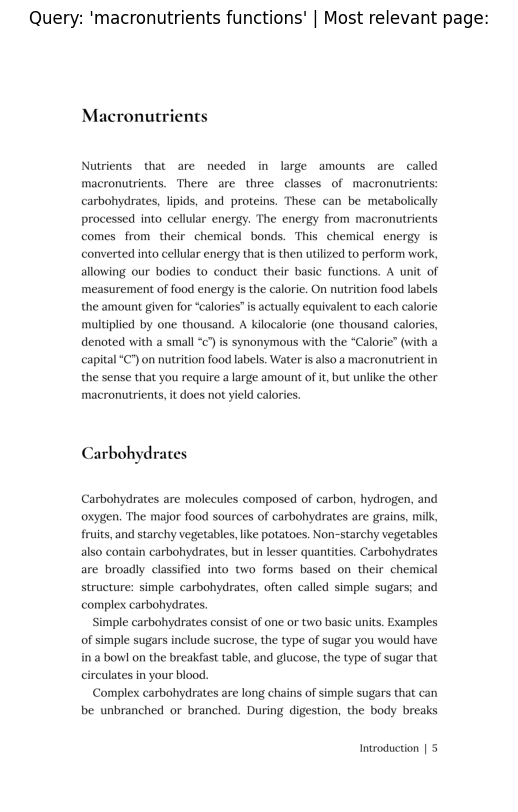

In [105]:
import fitz

pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41)

img = page.get_pixmap(dpi=300)

doc.close()

img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off')
plt.show()

In [106]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [107]:
import numpy as np
import faiss

def retrieve_relevant_resources(
    query: str,
    index,
    model: SentenceTransformer=embedding_model,
    n_resources_to_return: int = 5,
    print_time: bool = True
):

    query_embedding = model.encode(query)
    query_embedding = np.array([query_embedding]).astype("float32")

    faiss.normalize_L2(query_embedding)

    start_time = timer()

    scores, indices = index.search(query_embedding, n_resources_to_return)

    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to search {index.ntotal} embeddings: {end_time-start_time:.5f} seconds.")

    return scores[0], indices[0]


def print_top_results_and_scores(
    query: str,
    index,
    pages_and_chunks: list[dict]=pages_and_chunks,
    model: SentenceTransformer=embedding_model,
    n_resources_to_return: int = 5
):

    scores, indices = retrieve_relevant_resources(
        query=query,
        index=index,
        model=model,
        n_resources_to_return=n_resources_to_return
    )

    print(f"Query: {query}\n")
    print("Results:")

    for score, index_value in zip(scores, indices):
        print(f"Score: {score:.4f}")
        print_wrapped(pages_and_chunks[index_value]["sentence_chunk"])
        print(f"Page number: {pages_and_chunks[index_value]['page_number']}")
        print("\n")


In [128]:
query = "symptoms of pellagra"

scores, indices = retrieve_relevant_resources(query=query,
                                              index=index)
scores, indices

[INFO] Time taken to search 819 embeddings: 0.00026 seconds.


(array([0.37408715, 0.2937079 , 0.2720814 , 0.27097255, 0.2516263 ],
       dtype=float32),
 array([371, 640, 724, 557, 635]))

In [130]:
print_top_results_and_scores(query=query,
                             index=index)

[INFO] Time taken to search 819 embeddings: 0.00024 seconds.
Query: How do vitamins and minerals differ in their roles and importance for health?

Results:
Score: 0.6220
Water There is one other nutrient that we must have in large quantities: water.
Water does not contain carbon, but is composed of two hydrogens and one oxygen
per molecule of water. More than 60 percent of your total body weight is water.
Without it, nothing could be transported in or out of the body, chemical
reactions would not occur, organs would not be cushioned, and body temperature
would fluctuate widely. On average, an adult consumes just over two liters of
water per day from food and drink combined. Since water is so critical for
life’s basic processes, the amount of water input and output is supremely
important, a topic we will explore in detail in Chapter 4. Micronutrients
Micronutrients are nutrients required by the body in lesser amounts, but are
still essential for carrying out bodily functions. Micronutri

In [110]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [111]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [112]:
from huggingface_hub import login
login()

In [113]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "google/gemma-2b-it"
use_quantization_config = False
attn_implementation = "sdpa"

print(f"[INFO] Using model_id: {model_id}")
print(f"[INFO] Using attention implementation: {attn_implementation}")

tokenizer = AutoTokenizer.from_pretrained(model_id)

llm_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    attn_implementation=attn_implementation
)

print("Model loaded successfully")


[INFO] Using model_id: google/gemma-2b-it
[INFO] Using attention implementation: sdpa


Loading weights:   0%|          | 0/164 [00:00<?, ?it/s]

Model loaded successfully


In [114]:
llm_model


GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): GELUActivation()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
      )
    )
    (norm): GemmaRMSNorm((2048,), 

In [115]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [116]:
def get_model_mem_size(model: torch.nn.Module):

    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    model_mem_bytes = mem_params + mem_buffers
    model_mem_mb = model_mem_bytes / (1024**2)
    model_mem_gb = model_mem_bytes / (1024**3)

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012345856, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [117]:
input_text = "What are the macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

dialogue_template = [
    {"role": "user",
     "content": input_text}
]

prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False,
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients, and what roles do they play in the human body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model



In [118]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256)
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
         184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
            573,   3515,   2971, 235336,    107,    108,    106,   2516,    108]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971, 235336,    107,    108,    106,   2516,    108,
         21404, 235269,   1517, 235303, 235256,    476,  25497,    576,    573,
        186809, 184592,    578,   1024,  16065,    575,    573,   3515,   2971,
        235292,    109,    688,  12298,   1695, 184592,  66058,    109, 235287,
          5231, 156615,  56227,  66058,    108,   

In [119]:
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
  

In [120]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: What are the macronutrients, and what roles do they play in the human body?

Output text:
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
    * Trans fats can raise cholesterol levels and increase the r

In [121]:
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [131]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query,
                                              index=index) # Changed embeddings_np to index
scores, indices

Query: How does saliva help with digestion?
[INFO] Time taken to search 819 embeddings: 0.00027 seconds.


(array([0.63829684, 0.5852889 , 0.5609853 , 0.5543303 , 0.52727664],
       dtype=float32),
 array([147,  40, 733,  42, 242]))

In [132]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    base_prompt = base_prompt.format(context=context, query=query)

    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [140]:
query = random.choice(query_list)
print(f"Query: {query}")

scores, indices = retrieve_relevant_resources(query=query,
                                              index=index)

context_items = [pages_and_chunks[i] for i in indices]

prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: Explain the concept of energy balance and its importance in weight management.
[INFO] Time taken to search 819 embeddings: 0.00028 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is 

In [141]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

outputs = llm_model.generate(**input_ids,
                             temperature=0.7,
                             do_sample=True,
                             max_new_tokens=256)

output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: Explain the concept of energy balance and its importance in weight management.
RAG answer:
<bos>Sure, here's the explanation of the concept of energy balance in weight management:

**Energy balance** is the concept of maintaining a stable internal environment that supports body functions, including metabolism, growth, and reproduction. It involves balancing the amount of energy provided by food intake with the energy used for various bodily processes.

To maintain weight, individuals need to consume more calories than they expend. This ensures that their body has the necessary energy to perform essential functions, such as:

* **Metabolism:** The energy used for basic physiological functions like breathing, heartbeat, and digestion.
* **Muscle maintenance:** Muscle tissue requires energy to function, and preserving muscle mass contributes to overall weight maintenance.
* **Bone health:** Calcium and vitamin D from the diet contribute to the maintenance of strong bones and teeth.

In [142]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  index=index)

    context_items = [pages_and_chunks[i] for i in indices]

    for i, item in enumerate(context_items):
        item["score"] = scores[i]

    prompt = prompt_formatter(query=query,
                              context_items=context_items)
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    if return_answer_only:
        return output_text

    return output_text, context_items

In [143]:
query = random.choice(query_list)
print(f"Query: {query}")

answer, context_items = ask(query=query,
                            temperature=0.7,
                            max_new_tokens=512,
                            return_answer_only=False)

print(f"Answer:\n")
print_wrapped(answer)
print(f"Context items:")
context_items

Query: Describe the process of digestion and absorption of nutrients in the human body.
[INFO] Time taken to search 819 embeddings: 0.00029 seconds.
Answer:

Sure, here's a summary of the process of digestion and absorption of nutrients
in the human body:  The process of digestion begins even before you put food
into your mouth. When you feel hungry, your body sends a message to your brain
that it is time to eat. The brain then tells the mouth to get ready, and you
start to salivate in preparation for a meal. Once you have eaten, your digestive
system starts the process that breaks down the components of food into smaller
components that can be absorbed and taken into the body.  The digestive system
functions on two levels, mechanically to move and mix ingested food and
chemically to break down large molecules. The smaller nutrient molecules can
then be absorbed and processed by cells throughout the body for energy or used
as building blocks for new cells.  The absorption of nutrients 

[{'page_number': 68,
  'sentence_chunk': 'The Digestive System UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM AND HUMAN NUTRITION PROGRAM The process of digestion begins even before you put food into your mouth. When you feel hungry, your body sends a message to your brain that it is time to eat. Sights and smells influence your body’s preparedness for food. Smelling food sends a message to your brain. Your brain then tells the mouth to get ready, and you start to salivate in preparation for a meal. Once you have eaten, your digestive system (Figure 2.4 “The Human Digestive System”) starts the process that breaks down the components of food into smaller components that can be absorbed and taken into the body. To do this, the digestive system functions on two levels, mechanically to move and mix ingested food and chemically to break down large molecules. The smaller nutrient molecules can then be absorbed and processed by cells throughout the body for energy\xa0